In [1]:
# Machine Learning : Project - 1
# PGDCSAI - Kavya Gupta

In [ ]:
# Create a database in MYSQL server using MYSQL workbench, import the datasets and explore shape and size.

mysqlconn = pymysql.connect(host='localhost',
                                   user='root',
                                   password='mysql',
                                   db='mlproj1')

df1 = pd.read_sql('SELECT * FROM telechurn1', con=mysqlconn)
df2 = pd.read_sql('SELECT * FROM telechurn2', con=mysqlconn)

In [3]:
# Import the required libraries-

import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [4]:
# TO BE DELETED !!

df1=pd.read_csv("TelcomCustomer-Churn_1.csv")
df2=pd.read_csv("TelcomCustomer-Churn_2.csv")

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7043 entries, 0 to 7042

Data columns (total 10 columns):

 #   Column           Non-Null Count  Dtype 

---  ------           --------------  ----- 

 0   customerID       7043 non-null   object

 1   gender           7043 non-null   object

 2   SeniorCitizen    7043 non-null   int64 

 3   Partner          7043 non-null   object

 4   Dependents       7043 non-null   object

 5   tenure           7043 non-null   int64 

 6   PhoneService     7043 non-null   object

 7   MultipleLines    7043 non-null   object

 8   InternetService  7043 non-null   object

 9   OnlineSecurity   7043 non-null   object

dtypes: int64(2), object(8)

memory usage: 550.4+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7043 entries, 0 to 7042

Data columns (total 12 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   customerID        7043 non-null   object 

 1   OnlineBackup      7043 non-null   object 

 2   DeviceProtection  7043 non-null   object 

 3   TechSupport       7043 non-null   object 

 4   StreamingTV       7043 non-null   object 

 5   StreamingMovies   7043 non-null   object 

 6   Contract          7043 non-null   object 

 7   PaperlessBilling  7043 non-null   object 

 8   PaymentMethod     7043 non-null   object 

 9   MonthlyCharges    7043 non-null   float64

 10  TotalCharges      7043 non-null   object 

 11  Churn             7043 non-null   object 

dtypes: float64(1), object(11)

memory usage: 660.4+ KB


In [7]:
# Merge all datasets onto one and explore final shape and size.

df = pd.merge(df1, df2, how="inner")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
cdf=df.copy()

In [9]:
df.shape

(7043, 21)

In [10]:
# Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

def missing_values(df):
    return df.isnull().sum()/len(df)*100
    
print(missing_values(df))

customerID          0.0

gender              0.0

SeniorCitizen       0.0

Partner             0.0

Dependents          0.0

tenure              0.0

PhoneService        0.0

MultipleLines       0.0

InternetService     0.0

OnlineSecurity      0.0

OnlineBackup        0.0

DeviceProtection    0.0

TechSupport         0.0

StreamingTV         0.0

StreamingMovies     0.0

Contract            0.0

PaperlessBilling    0.0

PaymentMethod       0.0

MonthlyCharges      0.0

TotalCharges        0.0

Churn               0.0

dtype: float64


In [11]:
# Check if there are any duplicate records in the dataset? If any drop them.


def duplicates(df):
    return df[df.duplicated()]

print("duplicate rows-")
duplicates(df)

duplicate rows-


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
# Drop the columns which you think redundant for the analysis.

def dropping1(df, col1):
    return df.drop(col1, axis=1, inplace=True)
    
#dropping customerID column-
dropping1(df, 'customerID')

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
# Encode the categorical variables

catvar = [i for i in df.columns if df.dtypes[i] == object]
catvar

label1 = LabelEncoder()

def encoder(df):
    for i in catvar:
        q = label1.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [14]:
# Perform detailed statistical analysis on the data.
# Perform a detailed univariate, bivariate, and multivariate analysis with appropriate detailed comments after each analysis.

In [15]:
cdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [16]:
cdf.describe(include=object).transpose()

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [18]:
# Observations:

# We can see that there are 7043 total unique customers.
# The mean monthly charges is around 64.76 while the minimum is 18.25 and maximum is 118.75.
# The mean tenure of the customers is 32.37 months.

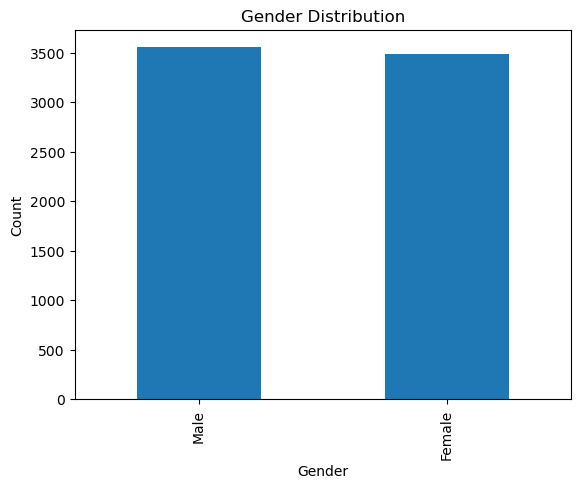

In [19]:
cdf['gender'].value_counts().plot(kind='bar')

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")

plt.show()

In [20]:
# Observations:

# As we can see, the number of male and female customers is almost equal.

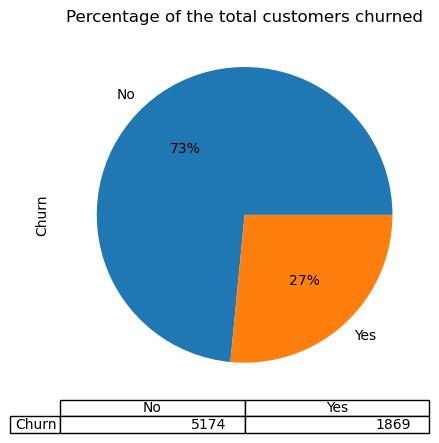

In [21]:
# Visualisng the percentage of the total customers churned

cdf['Churn'].value_counts().plot(kind='pie',autopct='%1.0f%%', title='Percentage of the total customers churned', table=True)
plt.show()

In [22]:
# Observations:

# As we can see, 27% of the customers are churned.

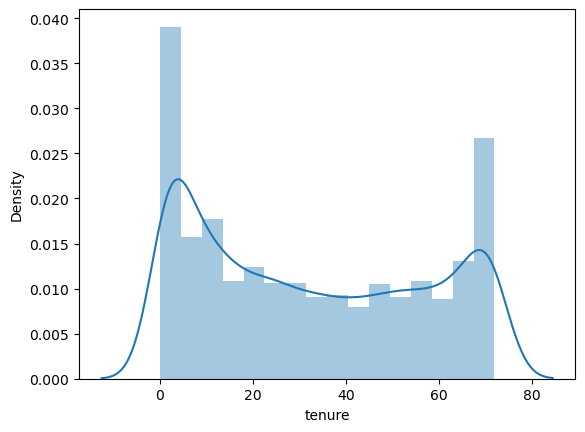

In [23]:
sns.distplot(cdf['tenure'])
plt.show()

In [24]:
# Observations:

# We can see that a large amount of tenure is less than 20 months.

In [28]:
## lets check the distribution of the different PaymentMethod.
sns.countplot(cdf['PaymentMethod'])
plt.xticks(rotation=90)
plt.show()

ValueError: could not convert string to float: 'Electronic check'

In [ ]:
# Observations:

# We can see that electronic check is the most popular mode of payment.

In [ ]:
#Data Preparation for model building:

In [ ]:
# Store the target column (i.e. Churn) in the y variable and the rest of the columns in the X variable.

x = df.drop(['Churn'],axis=1)  
y = df['Churn']

In [ ]:
# Split the dataset into two parts (i.e. 70% train and 30% test).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
# Standardize the columns using z-score scaling approach.

ss = StandardScaler()
x_train.iloc[:,:] = ss.fit_transform(x_train.iloc[:,:])
x_test.iloc[:,:] = ss.transform(x_test.iloc[:,:])

In [ ]:
# Model training, and testing:
models = [['Model Name', 'Train Data Score', 'Test Data Score']]

In [ ]:
# Logistic Regression Model-
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_train)

logregtrainacc = accuracy_score(y_train, y_pred)
print("Accuracy of training data: ", logregtrainacc)

y_predtest = logreg.predict(x_test)

logregtestacc = accuracy_score(y_test, y_predtest)
print("Accuracy of test data: ", logregtestacc)

models.append(['LogisticRegression', logregtrainacc, logregtestacc])

In [ ]:
# Gaussian Naive Bayes Model-

gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_train)

gnbtrainacc = accuracy_score(y_train, y_pred)
print("Accuracy of training data: ", gnbtrainacc)

y_predtest = gnb.predict(x_test)

gnbtestacc = accuracy_score(y_test, y_predtest)
print("Accuracy of test data: ", gnbtestacc)

models.append(['GaussianNB', gnbtrainacc, gnbtestacc])

In [ ]:
# Choosing the value of K for KNN -

error_rate = []
for i in range(1,15):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
# KNN Model -

# we have chosen 11 as the value for K

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_train)

knntrainacc = accuracy_score(y_train, y_pred)
print("Accuracy of training data: ", knntrainacc)

y_predtest = knn.predict(x_test)

knntestacc = accuracy_score(y_test, y_predtest)
print("Accuracy of test data: ", knntestacc)

models.append(['KNeighborsClassifier', knntrainacc, knntestacc])

In [ ]:
print(pd.DataFrame(models))

In [ ]:
# Conclusion and improvisation:



In [ ]:
Exploratory data analysis made it possible for us to draw a profile of clients that discontinue their subscriptions and the kind of services and contracts they usually sign for, which helps the company to make specific improvements and develop strategies to retain these clients.
We have explored the variables with respect to the subcription charges for the customers and inferred that the charges were a very important variable whether the customer is going to stay or churn.
The Company has pay more focus on the subscription charges for the customers and giving certain discounts and offers and promote their business and can make the customers retain with them.
We have build 3 different classification models, the logistic regression model is giving us the best accuracy score for training and testing with a balanced results.
Where as KNN model giving us the good accuarcy for the training but the accuracy is decreased when it comes to testing.
Please note, we have seen that the target class is imbalanced so, we can further go with evaluating the models based on the different performance metrics such as presicion, recall and F1score and choose the model accordingly.
Also, we can tune the hyperparameters and find the best set of hyperparameters will increase the classification accuracy of the model.